In [17]:
import numpy as np
import pandas as pd

In [390]:
df = pd.read_csv('./data/london_crime_by_lsoa.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [391]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [20]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [22]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [23]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [24]:
df.shape

(13490604, 7)

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [27]:
mpl.style.use(['ggplot'])

In [44]:
df.borough.unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [53]:
df.year.unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

In [68]:
criminal=df.groupby(['borough','year']).agg(sum_criminal = pd.NamedAgg('value', np.sum))
criminal

sum_criminal
borough              year              
Barking and Dagenham 2008         17656
                     2009         17713
                     2010         17130
                     2011         16686
                     2012         15990
...                                 ...
Westminster          2012         59226
                     2013         53852
                     2014         47564
                     2015         47395
                     2016         48330

[297 rows x 1 columns]

## Area Plots

Question : What borough that has the highest number of crime

In [56]:
criminal.sort_values(['sum_criminal'],ascending=[False])

sum_criminal
borough        year              
Westminster    2012         59226
               2011         54243
               2013         53852
               2009         48456
               2016         48330
...                           ...
City of London 2013           110
               2011            69
               2008             0
               2009             0
               2010             0

[297 rows x 1 columns]

Insight : Westminster

Question :
When the highest crime occured in Westminster?

In [60]:
Westminster = criminal.loc["Westminster"]
Westminster

,sum_criminal
year,
2008,47846
2009,48456
2010,48116
2011,54243
2012,59226
2013,53852
2014,47564
2015,47395
2016,48330


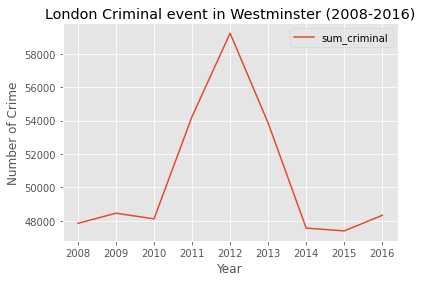

In [160]:
Westminster.plot()
plt.title('London Criminal event in Westminster (2008-2016)')
plt.ylabel('Number of Crime') 
plt.xlabel('Year') 

plt.show()

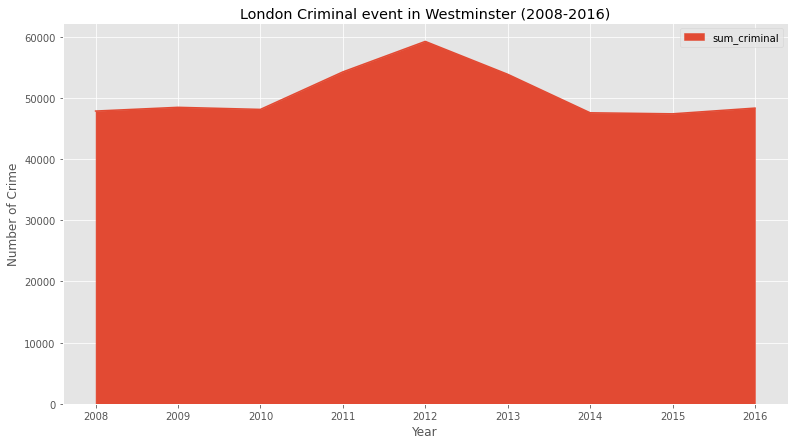

In [159]:
Westminster.plot(
    kind="area", figsize=(13, 7)
)
plt.title('London Criminal event in Westminster (2008-2016)')
plt.ylabel('Number of Crime') 
plt.xlabel('Year') 
plt.show()

Insight: in 2012

## Histogram

Question : What is the highest number of crimes in Westminster based on histogram plot?

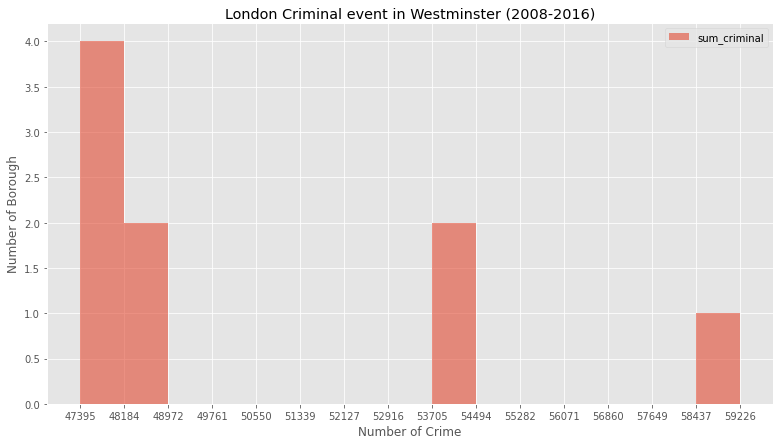

In [158]:
count, bin_edges = np.histogram(Westminster, bins=15)
Westminster.plot(
    kind="hist",
    figsize=(13, 7),
    alpha=.6,
    xticks=bin_edges,
    bins=15
)
plt.title("London Criminal event in Westminster (2008-2016)")
plt.xlabel("Number of Crime")
plt.ylabel("Number of Borough")
plt.show()

Insight : between 47395 and 48184

## Bar Charts

Question : When the Lowest crime occured in Sutton?

In [225]:
Sutton = criminal.loc["Sutton"]
Sutton

,sum_criminal
year,
2008,12943
2009,12240
2010,12032
2011,11068
2012,10948
2013,10057
2014,10443
2015,10598
2016,10658


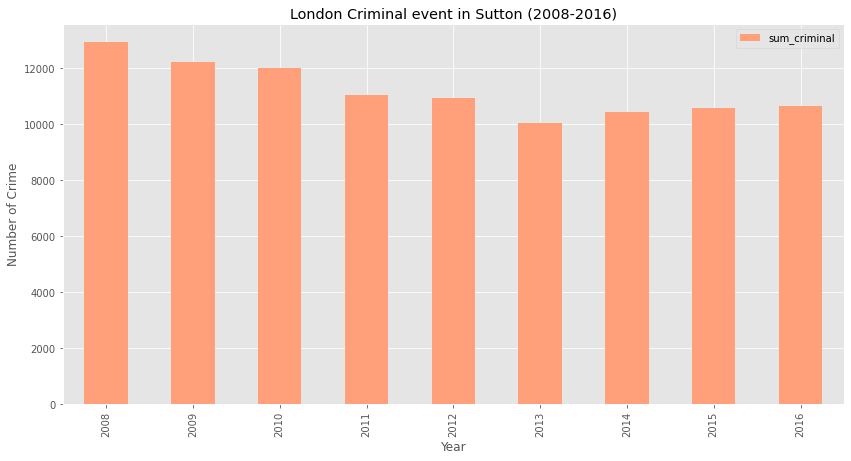

In [156]:
Sutton.plot(
    kind="bar",
    figsize=(14, 7),
    color="lightsalmon"
)
plt.title("London Criminal event in Sutton (2008-2016)")
plt.xlabel("Year")
plt.ylabel("Number of Crime")
plt.show()

Insight : in 2013

## Pie Charts

Question : What were the most common crimes in London based on major_category?

In [168]:
data_major=df.groupby("major_category").sum()["value"]
data_major

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64

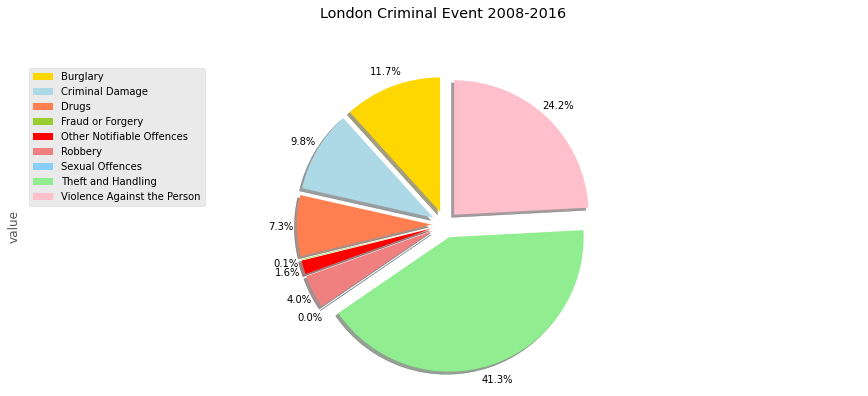

In [169]:
explode_sequence = ('0.1,' * len(criminal2)).split(',')
explode_sequence = [float(item) for item in explode_sequence if item !=""]

pie_colors = ["gold", "lightblue", "coral", "yellowgreen", "red", "lightcoral", "lightskyblue", "lightgreen", "pink"]

data_major.plot(kind="pie", figsize=(15, 6), shadow=True,
                        autopct="%1.1f%%", startangle=90, explode=explode_sequence,
                        colors=pie_colors, pctdistance=1.12, labels=None)

plt.legend(labels=df_major.index, loc="upper left")
plt.title("London Criminal Event 2008-2016", y=1.12)
plt.axis('equal')
plt.show()

Insight : Theft and Handling with percentage amount equal to 41.3%

## Box Plots

Question : What were the most common crimes in London based on minor_category?

In [170]:
data_minor=df.groupby("minor_category").sum()["value"]
data_minor

minor_category
Assault with Injury                       451001
Burglary in Other Buildings               263011
Burglary in a Dwelling                    491282
Business Property                          21295
Common Assault                            413690
Counted per Victim                          3840
Criminal Damage To Dwelling               154116
Criminal Damage To Motor Vehicle          265463
Criminal Damage To Other Building          66003
Drug Trafficking                           35819
Going Equipped                              5530
Handling Stolen Goods                      16100
Harassment                                458124
Motor Vehicle Interference & Tampering     56224
Murder                                       949
Offensive Weapon                           37983
Other Criminal Damage                     145356
Other Drugs                                 2998
Other Fraud & Forgery                       1485
Other Notifiable                          100819
Other

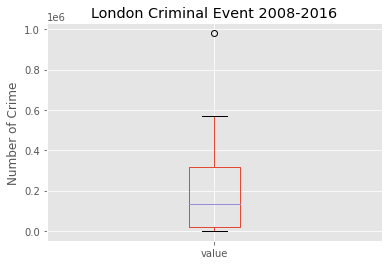

In [171]:
data_minor.plot(kind="box")
plt.title("London Criminal Event 2008-2016")
plt.ylabel("Number of Crime")
plt.show()

In [172]:
data_minor.max()

980085

Insight : 980095 -> Other Theft 

## Scatter Plots

Question : When the highest crime occurred?

In [165]:
import seaborn as sns

In [241]:
criminal=df.groupby(['borough','year']).agg(sum_criminal = pd.NamedAgg('value', np.sum))
criminal

sum_criminal
borough              year              
Barking and Dagenham 2008         17656
                     2009         17713
                     2010         17130
                     2011         16686
                     2012         15990
...                                 ...
Westminster          2012         59226
                     2013         53852
                     2014         47564
                     2015         47395
                     2016         48330

[297 rows x 1 columns]

In [242]:
criminal_per_year=criminal.reset_index()
criminal_per_year

,borough,year,sum_criminal
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990
...,...,...,...
292,Westminster,2012,59226
293,Westminster,2013,53852
294,Westminster,2014,47564
295,Westminster,2015,47395


<AxesSubplot:xlabel='year', ylabel='sum_criminal'>

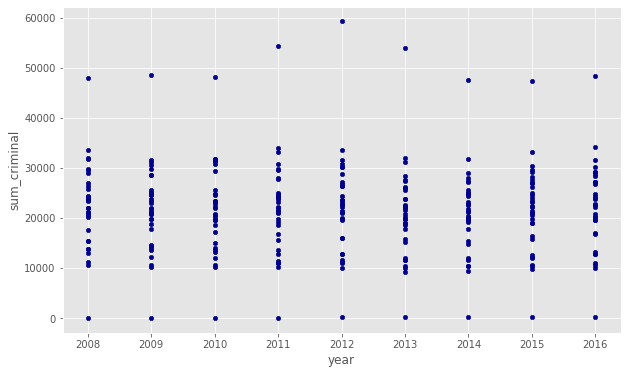

In [246]:
criminal_per_year.plot(kind='scatter', x='year', y='sum_criminal', figsize=(10, 6), color='darkblue')

Insight : In 2012

## Word Clouds

In [247]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes

!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [248]:
stopwords = set(STOPWORDS)

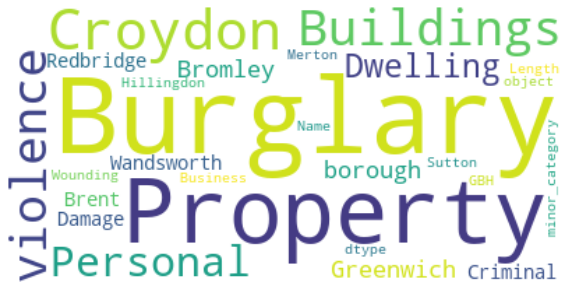

In [296]:
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
).generate(str(df['minor_category']))

plt.figure(figsize=(10, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [304]:
from PIL import Image
London_img = Image.open("data/London2.JPG")
London_mask = np.array(London_img)
print(London_mask.shape)

(664, 830, 3)


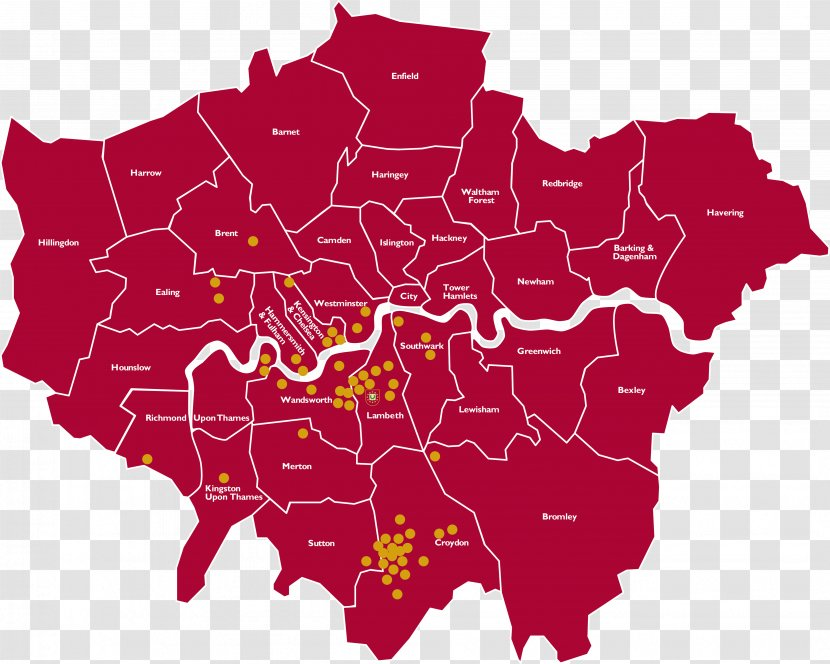

In [305]:
London_img

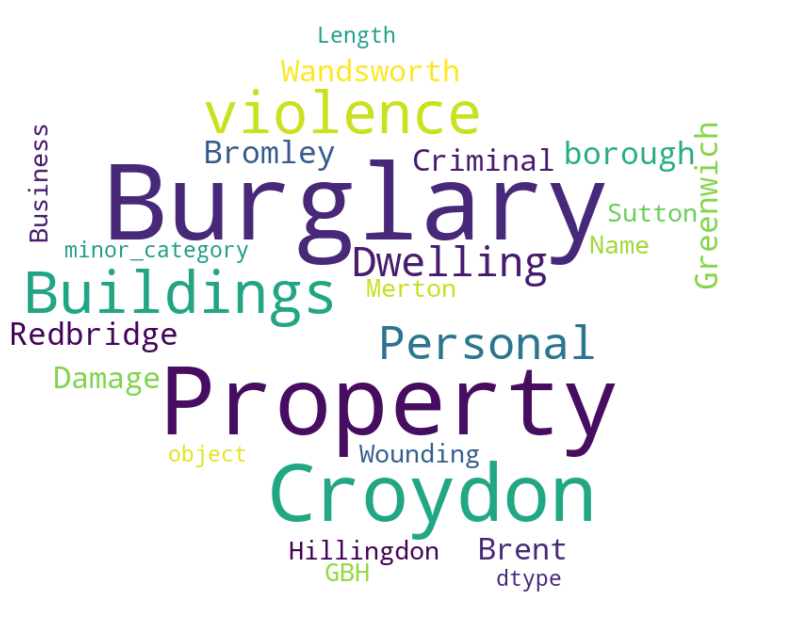

In [307]:
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    mask=London_mask
).generate(str(df['minor_category']))

plt.figure(figsize=(14, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium

In [308]:
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [309]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [448]:
# SP latitude and longitude
latitude = 51.509865
longitude = -0.118092

sf_map = folium.Map(location=(latitude, longitude), zoom_start=8)
sf_map